In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [245]:
X=pd.read_csv('/home/girish/Downloads/Linear_X_Train.csv')
Y=pd.read_csv('/home/girish/Downloads/Linear_Y_Train.csv')

In [246]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [247]:
X.shape,Y.shape

((3750, 1), (3750, 1))

In [248]:
type(X)

pandas.core.frame.DataFrame

# Normalize the data

In [249]:
X=X.values
Y=Y.values


Text(0, 0.5, 'Score')

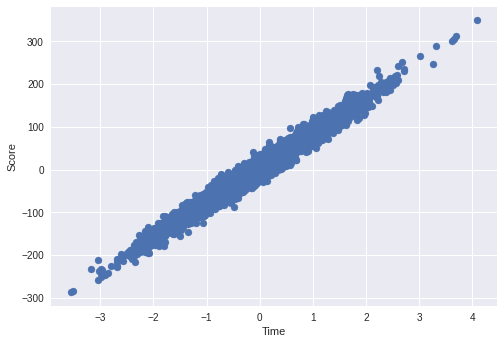

In [250]:
plt.xlabel('Time')
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.ylabel('Score')

In [251]:
X,Y

(array([[-0.28930742],
        [-0.58880963],
        [ 1.02750749],
        ...,
        [-0.30516366],
        [ 1.67583291],
        [-0.49175724]]),
 array([[-9.11011171e-02],
        [-5.34677208e+01],
        [ 7.54570088e+01],
        ...,
        [-3.49832749e+01],
        [ 1.45206092e+02],
        [-1.71244939e+01]]))

In [252]:
u=X.mean()
std=X.std()
print(u,std)

-0.03779466168006854 0.9920801322508517


In [253]:
X=(X-u)/std

In [254]:
X

array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

# gradient descent Function

In [255]:
def hypothesis(X,theta):
    y_=theta[0]+theta[1]*X
    return y_

In [256]:
def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros(2)
    for i in range(m):
        grad[0]+=hypothesis(X[i],theta)-Y[i]
        grad[1]+=(hypothesis(X[i],theta)-Y[i])*X[i]
        
    return grad/m;
        

In [257]:
def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    for i in range(m):
        total_error+=(hypothesis(X[i],theta)-Y[i])**2
    return total_error/m
    

In [291]:
def gradientDescent(X,Y,lr=0.1):
    theta=np.zeros(2)
    theta_list=[]
    error_list=[]
    for i in range(100):
        e=error(X,Y,theta)
        error_list.append(e)
        grad=gradient(X,Y,theta)
        theta[0]=theta[0]-lr*grad[0]
        theta[1]=theta[1]-lr*grad[1]
        
        theta_list.append((theta[0],theta[1]))
        
    return theta,error_list,theta_list
    

In [292]:
theta,error_list,theta_list=gradientDescent(X,Y,0.2)

In [293]:
theta_list

[(0.13677379360311834, 15.981147388499958),
 (0.2461928284856122, 28.766065299299896),
 (0.33372805639160774, 38.993999627939864),
 (0.40375623871640354, 47.17634709085185),
 (0.4597787845762403, 53.722225061181426),
 (0.5045968212641101, 58.958927437445105),
 (0.5404512506144057, 63.14828933845604),
 (0.5691347940946423, 66.4997788592648),
 (0.5920816288788315, 69.18097047591179),
 (0.6104390967061828, 71.32592376922939),
 (0.6251250709680635, 73.04188640388347),
 (0.6368738503775683, 74.41465651160672),
 (0.6462728739051723, 75.51287259778533),
 (0.6537920927272555, 76.39144546672823),
 (0.6598074677849217, 77.09430376188254),
 (0.6646197678310553, 77.65659039800599),
 (0.6684696078679618, 78.10641970690475),
 (0.671549479897487, 78.46628315402376),
 (0.6740133775211069, 78.75417391171896),
 (0.6759844956200032, 78.98448651787513),
 (0.6775613900991204, 79.16873660280005),
 (0.678822905682414, 79.31613667074),
 (0.6798321181490491, 79.43405672509195),
 (0.6806394881223566, 79.5283927

In [260]:
theta

array([ 0.68386897, 79.90573693])

In [261]:
error_list

[array([6576.35005246]),
 array([4277.60804215]),
 array([2806.41315555]),
 array([1864.84842813]),
 array([1262.24700257]),
 array([876.58209022]),
 array([629.75654632]),
 array([471.78819822]),
 array([370.68845543]),
 array([305.98462005]),
 array([264.57416541]),
 array([238.07147443]),
 array([221.10975221]),
 array([210.25424999]),
 array([203.30672857]),
 array([198.86031486]),
 array([196.01461008]),
 array([194.19335903]),
 array([193.02775835]),
 array([192.28177392]),
 array([191.80434388]),
 array([191.49878866]),
 array([191.30323332]),
 array([191.1780779]),
 array([191.09797843]),
 array([191.04671477]),
 array([191.01390603]),
 array([190.99290843]),
 array([190.97946997]),
 array([190.97086935]),
 array([190.96536496]),
 array([190.96184215]),
 array([190.95958755]),
 array([190.95814461]),
 array([190.95722112]),
 array([190.95663009]),
 array([190.95625183]),
 array([190.95600975]),
 array([190.95585481]),
 array([190.95575565]),
 array([190.95569219]),
 array([190.

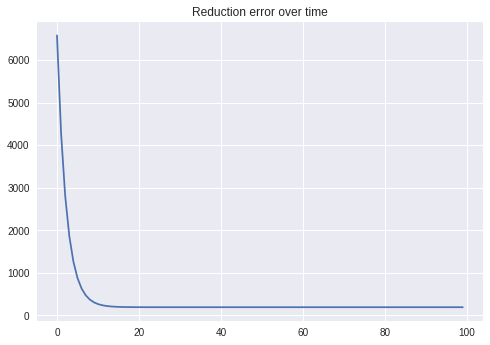

In [262]:
plt.title('Reduction error over time')
plt.plot(error_list)

In [263]:
y_=hypothesis(X,theta)

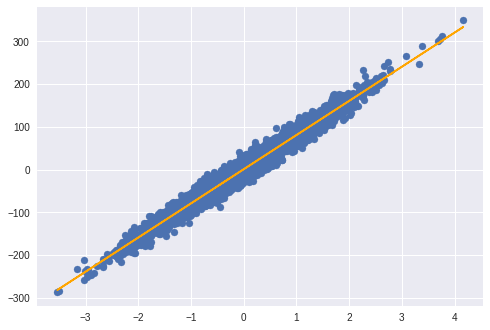

In [264]:
plt.scatter(X,Y)
plt.plot(X,y_,color='orange')

# Prediction 

In [265]:
x_test=pd.read_csv('/home/girish/Downloads/Linear_X_Test.csv').values
y_prediction=hypothesis(x_test,theta)

In [266]:
y_prediction.shape

(1250, 1)

In [267]:
df=pd.DataFrame(data=y_prediction,columns=['y'])

In [268]:
df

,y
0,-149.374663
1,-68.756767
2,-201.492222
3,221.240119
4,47.908170
...,...
1245,-12.744968
1246,75.173799
1247,10.912428
1248,-21.532930


In [269]:
df.to_csv('/home/girish/Downloads/y_prediction.csv',index=False)

# Check Accuracy by R2 Score

In [270]:
def r2_score(y,y_):
    numer=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    
    return (1-(numer/denom))*100

In [271]:
r2_score(Y,y_)

97.09612233822354

In [286]:
from mpl_toolkits.mplot3d import Axes3D

In [272]:
T0=np.arange(-40,40,1)
T1=np.arange(40,120,1)

In [273]:
print(T0,T1)

[-40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23
 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5
  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13
  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39] [ 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119]


# 3D Surface plot and Contour plot

In [274]:
T0,T1=np.meshgrid(T0,T1)
J=np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_= T1[i,j]*X + T0[i,j]
        J[i,j]=np.sum((Y-y_)**2)/Y.shape[0]

/tmp/ipykernel_17841/3714223926.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes=fig.gca(projection='3d')


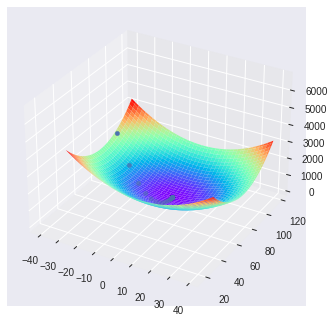

In [297]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[ : ,0],theta_list[ : ,1],error_list)
plt.show()


/tmp/ipykernel_17841/818966887.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes=fig.gca(projection='3d')


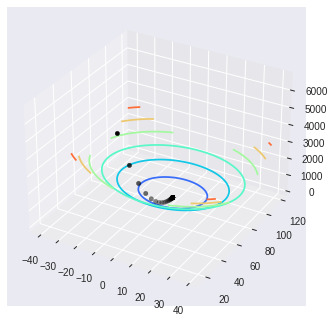

In [300]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[ : ,0],theta_list[ : ,1],error_list,color='black')
plt.show()

# 2D Contour plot

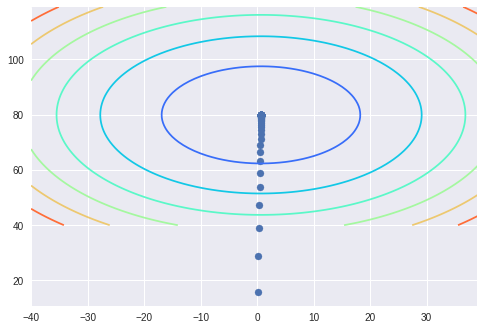

In [308]:

plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[ : ,0],theta_list[ : ,1])
plt.show()

In [294]:
theta_list=np.array(theta_list)

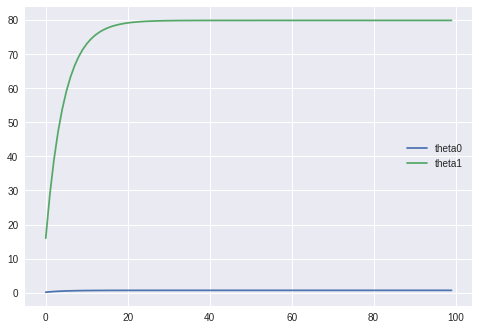

In [296]:
plt.plot(theta_list[ : ,0],label='theta0')
plt.plot(theta_list[ : ,1],label='theta1')
plt.legend()

In [310]:
np.save("ThetaList.npy",theta_list)